Dream Housing Finance company deals in all home loans. 
Customers first apply for home loan after that company validates the customer eligibility for loan.

Problem
A Company wants to automate the loan eligibility process (real time) based on customer detail provided 
while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. 

To automate this process, they want  to identify the customers’ segments, those are eligible for loan amount so that they can specifically target these customers. 
A partial data set has been released

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
df = pd.read_csv('train.csv')
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [156]:
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Few of the columns have missing values. Need to handle them

In [157]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [158]:
temp=df['Self_Employed'].value_counts()
temp.head()



No     500
Yes     82
Name: Self_Employed, dtype: int64

In [113]:
df['Loan_Status'].value_counts()


Y    422
N    192
Name: Loan_Status, dtype: int64

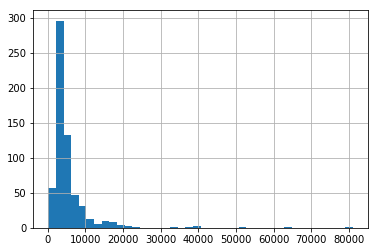

In [159]:

df['ApplicantIncome'].hist(bins=40)


Looking at the above graph we can see the different income levels in the society. few outliers in extreme cases

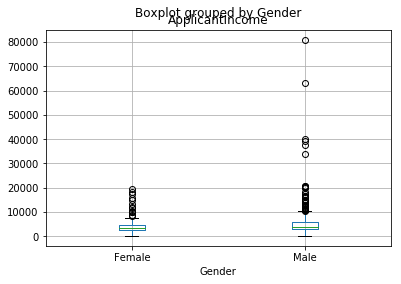

In [160]:
df.boxplot(column='ApplicantIncome', by = 'Gender')


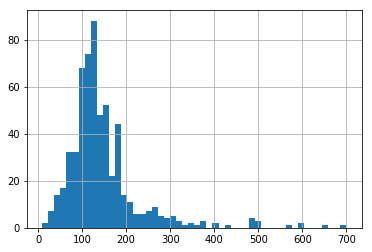

In [68]:
df['LoanAmount'].hist(bins=50)  #X-axis: the values of loan amount #Y-axis: the frequencies of different values of loan amount


In [4]:
df.apply(lambda x: sum(x.isnull()),axis=0) #to tell the missing values in each column


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,84.037468,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.Self_Employed = df.Self_Employed.fillna('No')
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,84.037468,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


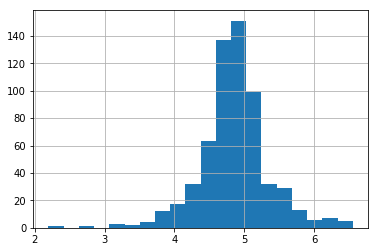

In [7]:
df['LoanAmount_log'] = np.log(df['LoanAmount']) #log function to reduce the extreme effect in Loan amount
df['LoanAmount_log'].hist(bins=20)

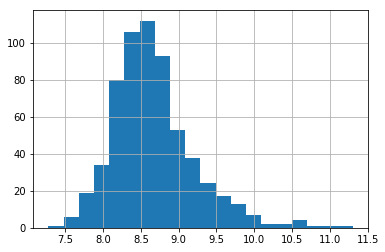

In [8]:
#to decrease the extreme values of ApplicantIncome (which can be ssen from the previous barplot), we can add CoApplicantIncome to compensate the value 
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [9]:
md = df['Married'].value_counts(ascending=True)
md.head()
df.Married = df.Married.fillna('Yes')
df.Loan_Status = df.Loan_Status.fillna('1')
df.Dependents = df.Dependents.fillna('0')




In [167]:
df['Dependents'].value_counts(ascending=True)

3+     51
2     101
1     102
0     360
Name: Dependents, dtype: int64

In [169]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [11]:
df.Gender =df.Gender.fillna('Male')
#df.Credit_History = df.Credit_History.fillna('1.0')
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [11]:
 df['Dependents'].value_counts(ascending=True)



3+     51
2     101
1     102
0     360
Name: Dependents, dtype: int64

In [145]:
df.isnull().any()


Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term      True
Credit_History       False
Property_Area        False
Loan_Status          False
LoanAmount_log       False
TotalIncome          False
TotalIncome_log      False
dtype: bool

In [12]:
from sklearn.preprocessing import LabelEncoder

var_col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()  #Encode labels with value between 0 and n_classes-1.
for i in var_col:
    print(i)
    df[i] = le.fit_transform(df[i]) #Fit label encoder and return encoded labels
df.dtypes

Gender
Married
Dependents
Education
Self_Employed
Property_Area
Loan_Status


Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [173]:
df['Loan_Status'].value_counts()


1    422
0    192
Name: Loan_Status, dtype: int64

In [174]:
df['Credit_History'].value_counts()


1.0    525
0.0     89
Name: Credit_History, dtype: int64

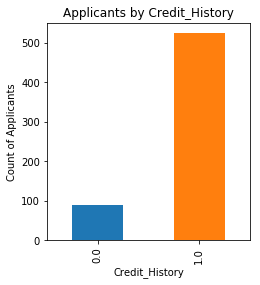

In [175]:
temp1 = df['Credit_History'].value_counts(ascending=True)
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

# Above graph shows that chances of application getting qualified are high if credit history is good!

# Stack charts  trying to split the terms into long term , short terms and use them for moelling. 
Did not get a chance to use them in modelling

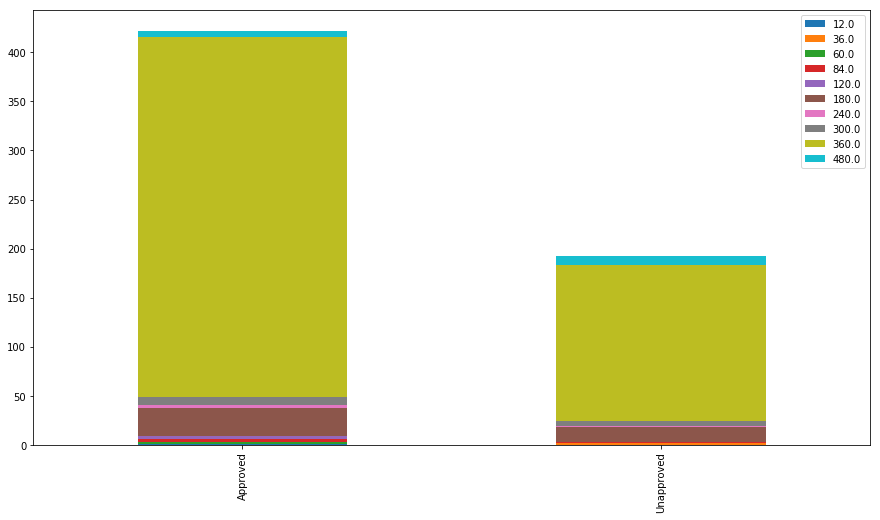

In [178]:
approved_term = df[df['Loan_Status']==1]['Loan_Amount_Term'].value_counts()
unapproved_term = df[df['Loan_Status']==0]['Loan_Amount_Term'].value_counts()
df1 = pd.DataFrame([approved_term,unapproved_term])
df1.index = ['Approved','Unapproved']
df1.plot(kind='bar', stacked=True, figsize=(15,8))

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy import interp
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



def classification_model(model, data, predictors, outcome):
    X_train, X_test, y_train, y_test = train_test_split(data[predictors], data[outcome], test_size=0.2, random_state = 2) # 0.2 test_size means 20%

    print(f'X_train shape {X_train.shape}')
    print(f' y_train shape {y_train.shape}')
    print(f' X_test shape {X_test.shape}')
    print(f' y_test shape {y_test.shape}')
    
    model.fit(X_train,y_train)
    probs = model.predict_proba(X_test)
    predictions = probs[:,1]
    
    print(predictions.shape)
    fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
    roc_auc = metrics.auc(fpr, tpr)
    
    Y_pred = np.squeeze(model.predict(X_test))
    threshold = 0.5
    print(classification_report(y_test, Y_pred > threshold))
    cnf_matrix = confusion_matrix(y_test, Y_pred)
    print(cnf_matrix)
    #target_names = [0, 1]
    #print(classification_report(y_test, predictions, target_names=target_names))

    # method I: pltx
    import matplotlib.pyplot as plt
    '''
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    '''

    kf = StratifiedKFold(n_splits=5)
    tprs = []
    aucs = []
    mean_fpr  = np.linspace(0,1,100)
    i = 0
    for train, test in kf.split(data[predictors],data[outcome]):

        train_predictors = (data[predictors].iloc[train,:])
        train_target = data[outcome].iloc[train]
        probs = model.fit(train_predictors, train_target).predict_proba(data[predictors].iloc[test,:])
        
        fpr, tpr, thresholds = metrics.roc_curve(data[outcome].iloc[test,:], probs[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return  mean_fpr, mean_tpr
    #print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    #Fit the model again so that it can be refered outside the function:
    #model.fit(data[predictors],data[outcome])

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# chances that a loan will be approved are high if 1.prior credit history2.higher income bracket 3.higher education.


In [14]:
fpr_list=[]
tpr_list=[]
model_list=[]

In [ ]:
As we saw above since credit_history plays dominant factor in qualification process. Logistic Regression just 
with the credit_history as preditor

X_train shape (491, 1)
 y_train shape (491, 1)
 X_test shape (123, 1)
 y_test shape (123, 1)
(123,)
             precision    recall  f1-score   support

          0       0.87      0.33      0.48        39
          1       0.76      0.98      0.85        84

avg / total       0.79      0.77      0.74       123

[[13 26]
 [ 2 82]]


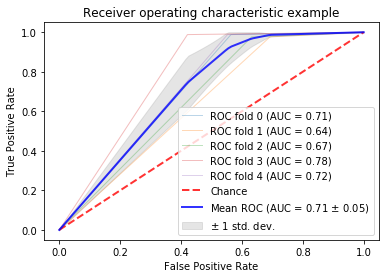

In [15]:
outcome_var = ['Loan_Status']
model = LogisticRegression()
predictor_var = ['Credit_History']
fpr, tpr = classification_model(model, df,predictor_var,outcome_var)


# Adding Education,income,loan Amount along with the credit_history.Adding the variables did not increase F1 score much. Usually adding variables causes overfitting!

X_train shape (491, 2)
 y_train shape (491, 1)
 X_test shape (123, 2)
 y_test shape (123, 1)
(123,)
             precision    recall  f1-score   support

          0       0.87      0.33      0.48        39
          1       0.76      0.98      0.85        84

avg / total       0.79      0.77      0.74       123



/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


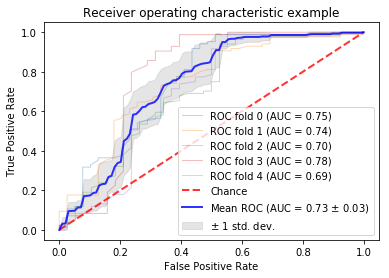

In [132]:

outcome_var = ['Loan_Status']
model = LogisticRegression(n_jobs=-1)
predictor_var = ['Credit_History','LoanAmount']
classification_model(model, df,predictor_var,outcome_var)

# Applying log transformation on the Total Income(Income+Co Applicant Income) and Loan Amount, as there are extreme values in the above graph

X_train shape (491, 5)
 y_train shape (491, 1)
 X_test shape (123, 5)
 y_test shape (123, 1)
(123,)
             precision    recall  f1-score   support

          0       0.87      0.33      0.48        39
          1       0.76      0.98      0.85        84

avg / total       0.79      0.77      0.74       123

[[13 26]
 [ 2 82]]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


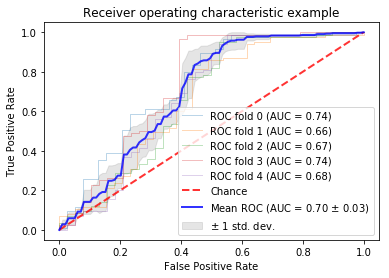

In [15]:
outcome_var = ['Loan_Status']
model = LogisticRegression()
predictor_var = ['Gender', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)


# Trying Grid search to figure out the best params for Logistic Regression and running logistic regression with those params

X_train shape (491, 5)
 y_train shape (491, 1)
 X_test shape (123, 5)
 y_test shape (123, 1)
(123,)
             precision    recall  f1-score   support

          0       0.87      0.33      0.48        39
          1       0.76      0.98      0.85        84

avg / total       0.79      0.77      0.74       123

[[13 26]
 [ 2 82]]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

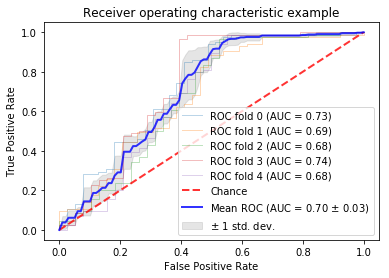

{'C': 1}


In [133]:
from sklearn.model_selection import GridSearchCV
outcome_var = ['Loan_Status']
#model = LogisticRegression()
predictor_var = ['Gender', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(), param_grid)
fpr,tpr=classification_model(clf, df,predictor_var,outcome_var)
fpr_list.append(fpr)
tpr_list.append(tpr)
model_list.append("LogisticRegression")
print(clf.best_params_)


# Running logistic regression after the grid search

X_train shape (491, 3)
 y_train shape (491, 1)
 X_test shape (123, 3)
 y_test shape (123, 1)
(123,)
             precision    recall  f1-score   support

          0       0.53      0.46      0.49        39
          1       0.76      0.81      0.79        84

avg / total       0.69      0.70      0.69       123



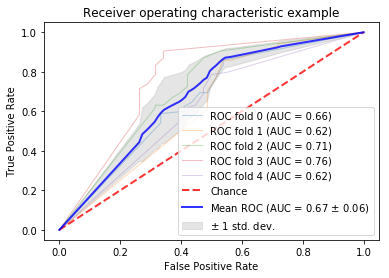

In [156]:
outcome_var = ['Loan_Status']
model = tree.DecisionTreeClassifier()
#predictor_var = ['Credit_History','Gender','Education','LoanAmount']
predictor_var = ['Credit_History','Education','LoanAmount']
classification_model(model, df,predictor_var,outcome_var)

X_train shape (491, 1)
 y_train shape (491, 1)
 X_test shape (123, 1)
 y_test shape (123, 1)
(123,)
             precision    recall  f1-score   support

          0       0.87      0.33      0.48        39
          1       0.76      0.98      0.85        84

avg / total       0.79      0.77      0.74       123

[[13 26]
 [ 2 82]]


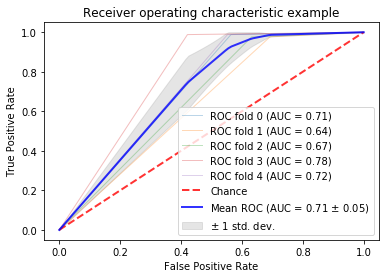

In [134]:
outcome_var = ['Loan_Status']
model = tree.DecisionTreeClassifier()
#predictor_var = ['Credit_History','Gender','Education','LoanAmount']
predictor_var = ['Credit_History']
fpr,tpr=classification_model(model, df,predictor_var,outcome_var)
fpr_list.append(fpr)
tpr_list.append(tpr)
model_list.append("DecisionTreeClassifier")

3


# Decision Tree classifier(credit_history) f1 score is comparable to Logistic Regression(credit_history)


X_train shape (491, 9)
 y_train shape (491, 1)
 X_test shape (123, 9)
 y_test shape (123, 1)
(123,)
             precision    recall  f1-score   support

          0       0.75      0.38      0.51        39
          1       0.77      0.94      0.84        84

avg / total       0.76      0.76      0.74       123

[[15 24]
 [ 5 79]]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:61: DataConversionWarning: A column-vector y was passed whe

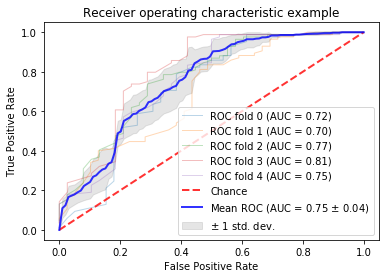

TotalIncome       0.290420
Credit_History    0.256654
LoanAmount        0.245505
Dependents        0.057059
Property_Area     0.052916
Married           0.026907
Gender            0.025795
Education         0.023954
Self_Employed     0.020790
dtype: float64


In [47]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area',
        'LoanAmount','TotalIncome']


classification_model(model, df,predictor_var,outcome_var)

featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)



### RandomForest gives the top predictors .From that list chose the top 5 variables

In [16]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

X_train shape (491, 5)
 y_train shape (491, 1)
 X_test shape (123, 5)
 y_test shape (123, 1)
(123,)
             precision    recall  f1-score   support

          0       0.76      0.33      0.46        39
          1       0.75      0.95      0.84        84

avg / total       0.76      0.76      0.72       123

[[13 26]
 [ 4 80]]


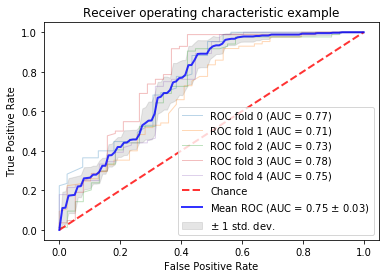

{'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 15, 'n_estimators': 50}


In [17]:
from sklearn.model_selection import GridSearchCV
outcome_var = ['Loan_Status']
predictor_var = ['Gender', 'Credit_History', 'Property_Area',
        'LoanAmount','TotalIncome']
param_grid = { 'n_estimators':[50, 100, 300],'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth':[3,7,10],'min_samples_split':[5, 15, 25, 50]}
clf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid,cv=5)
fpr,tpr=classification_model(clf, df,predictor_var,outcome_var)
fpr_list.append(fpr)
tpr_list.append(tpr)


print(clf.best_params_)

# Running the RandomForestClassifer with the above best params 

X_train shape (491, 5)
 y_train shape (491, 1)
 X_test shape (123, 5)
 y_test shape (123, 1)
(123,)
             precision    recall  f1-score   support

          0       0.76      0.33      0.46        39
          1       0.75      0.95      0.84        84

avg / total       0.76      0.76      0.72       123

[[13 26]
 [ 4 80]]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:61: DataConversionWarning: A column-vector y was passed whe

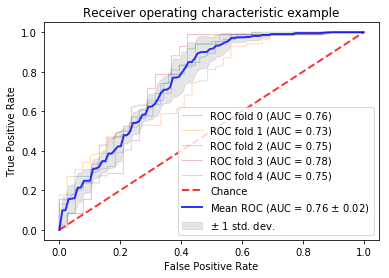

In [135]:
#model = RandomForestClassifier(n_estimators=100)
model = RandomForestClassifier(n_estimators=100, min_samples_split=15, max_depth=3)

predictor_var = ['Dependents', 'Credit_History', 'Property_Area',
        'LoanAmount','TotalIncome']

fpr,tpr=classification_model(model, df,predictor_var,outcome_var)
fpr_list.append(fpr)
tpr_list.append(tpr)
model_list.append("RandomForest")


# Using Supervised learning techniques since have a small dataset and checking for its performance

In [17]:
!open .

X_train shape (491, 4)
 y_train shape (491, 1)
 X_test shape (123, 4)
 y_test shape (123, 1)
(123,)
             precision    recall  f1-score   support

          0       0.47      0.38      0.42        39
          1       0.74      0.80      0.77        84

avg / total       0.65      0.67      0.66       123



/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

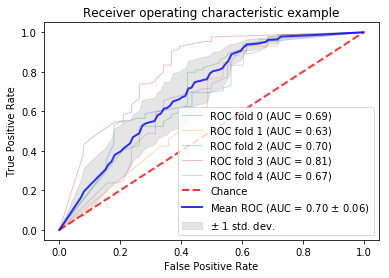

In [152]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
outcome_var = ['Loan_Status']
predictor_var = ['Gender', 'Credit_History','LoanAmount','Education']
#X_train, X_test, y_train, y_test = train_test_split(df[predictor_var], df[outcome_var], test_size=0.2, random_state = 2) # 0.2 test_size means 20%
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1,class_weight="balanced"))
classification_model(model, df,predictor_var,outcome_var)
#model.fit(X_train, y_train)
#model.score(X_test,y_test)

X_train shape (491, 4)
 y_train shape (491, 1)
 X_test shape (123, 4)
 y_test shape (123, 1)
(123,)
             precision    recall  f1-score   support

          0       0.46      0.44      0.45        39
          1       0.74      0.76      0.75        84

avg / total       0.65      0.66      0.66       123

[[17 22]
 [20 64]]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

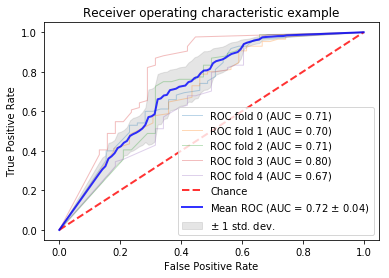

In [136]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
outcome_var = ['Loan_Status']
predictor_var = ['Gender', 'Credit_History','LoanAmount','Education']
#X_train, X_test, y_train, y_test = train_test_split(df[predictor_var], df[outcome_var], test_size=0.2, random_state = 2) # 0.2 test_size means 20%
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1,class_weight="balanced"))
fpr,tpr=classification_model(model, df,predictor_var,outcome_var)
fpr_list.append(fpr)
tpr_list.append(tpr)
model_list.append("BaggingClassifier")



X_train shape (491, 5)
 y_train shape (491, 1)
 X_test shape (123, 5)
 y_test shape (123, 1)
(123,)
             precision    recall  f1-score   support

          0       0.67      0.31      0.42        39
          1       0.74      0.93      0.83        84

avg / total       0.72      0.73      0.70       123

[[12 27]
 [ 6 78]]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


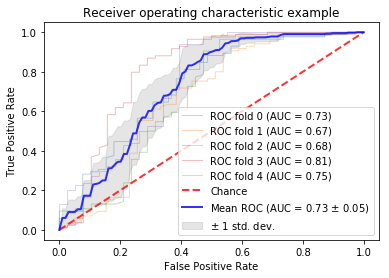

In [137]:
from sklearn.ensemble import GradientBoostingClassifier

outcome_var = ['Loan_Status']
#predictor_var = ['Gender', 'Credit_History','LoanAmount','Education']
predictor_var = ['Gender', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
model = GradientBoostingClassifier()
fpr,tpr=classification_model(model, df,predictor_var,outcome_var)
fpr_list.append(fpr)
tpr_list.append(tpr)
model_list.append("GradientBoosting")


<Figure size 432x288 with 0 Axes>

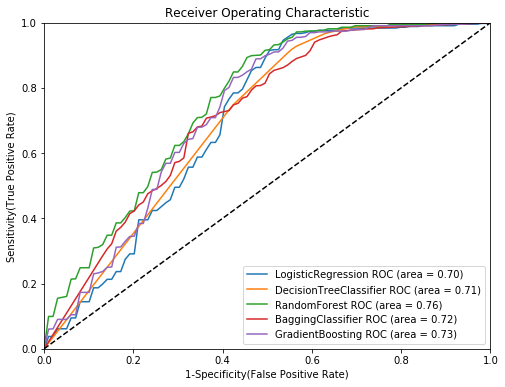

In [139]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

list_len = len(fpr_list)
plt.clf()
plt.figure(figsize=(8,6))

for i in range(0,list_len):
    fpr= fpr_list[i]
    tpr=tpr_list[i]
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (model_list[i], roc_auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc=0)
plt.show()   # Display
        
        
        
        
        
        

# 